In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_iris

iris_dataset=load_iris()
# e데이터 셋들의 키를 나타냄
print(format(iris_dataset.keys()))
# 데이터 베이스의 설명을 불러오기
print(iris_dataset['DESCR'][:193]+ "\n")
# 데이터 베이스 설명 크게 보기
print(iris_dataset.DESCR)
# 타겟을 이름 출력
print(format(iris_dataset['target_names']))
# 특징 이름 출력
print(format(iris_dataset['feature_names']))
# 타깃을 출력함
print(format(iris_dataset['target']))
# 데이터
print(format(iris_dataset['data']))
print(format(iris_dataset['data'][:5]))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== =================

In [2]:
# 훈련과 테스트 분활
# random_state는 다른값 나오는거 방지하게 seed를 삽입해 주는것.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
# print(x_train)
print(format(x_train.shape))


(112, 4)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

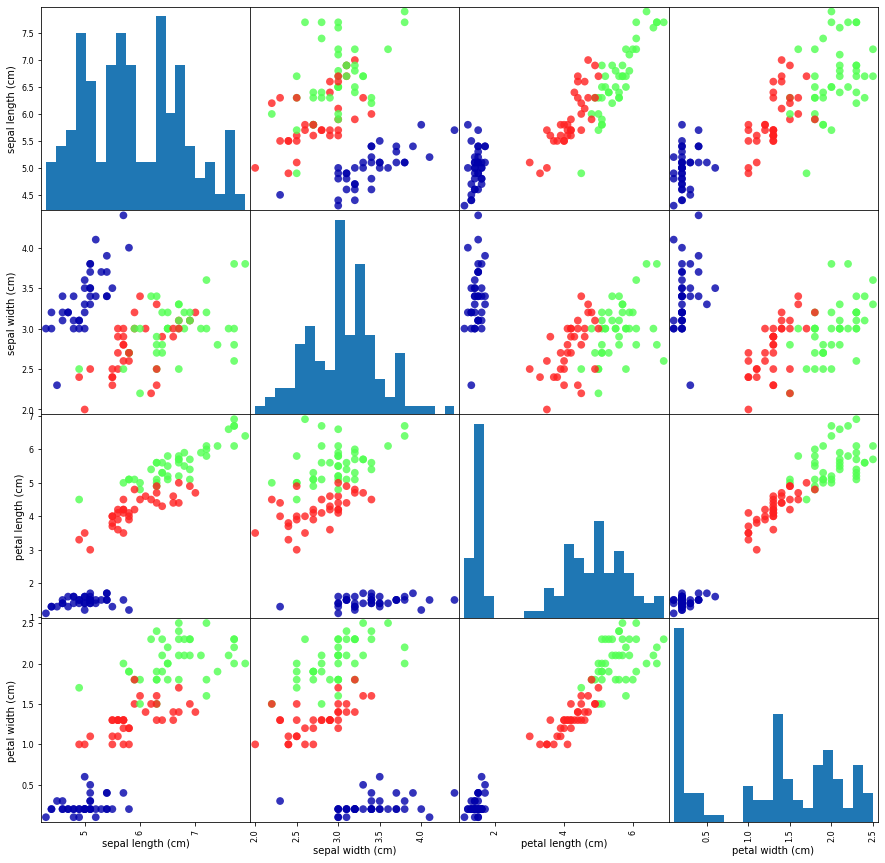

In [3]:
iris_dataframe = pd.DataFrame(x_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize= (15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [4]:
# 분류기 불러오기
from sklearn.neighbors import KNeighborsClassifier
# 이웃수 =1
knn = KNeighborsClassifier(n_neighbors=1)
# 훈련데이터와 레이블로 모델 훈련
knn.fit(x_train, y_train)
# 새 데이터 분류 해보기
X_new = np.array([[5,2.9,1,0.2]])
print(X_new.shape)

prediction = knn.predict(X_new)
# 새로운 데이터를 기반으로 타겟의 기댓값을 예상함
print(prediction)
print(iris_dataset['target_names'][prediction])
# 테스트 세트에 대한 예측값
y_pred = knn.predict(x_test)
print(y_pred)

(1, 4)
[0]
['setosa']
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [5]:
# 정확도 측정
# 이는 이미 되어있는 것과 비교하여 측정
# 같을 경우
print(format(np.mean(y_pred==y_test)))
# knn모델의 score내장함수 사용
print(format(knn.score(x_test,y_test)))

0.9736842105263158
0.9736842105263158


In [6]:

#### 여기부터 실습에 나온 것에 대한 테스트 입니다###

# size를 변경하여 새로운 데이터 입력
x_train2, x_test2, y_train2, y_test2 = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.33,random_state=42)

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

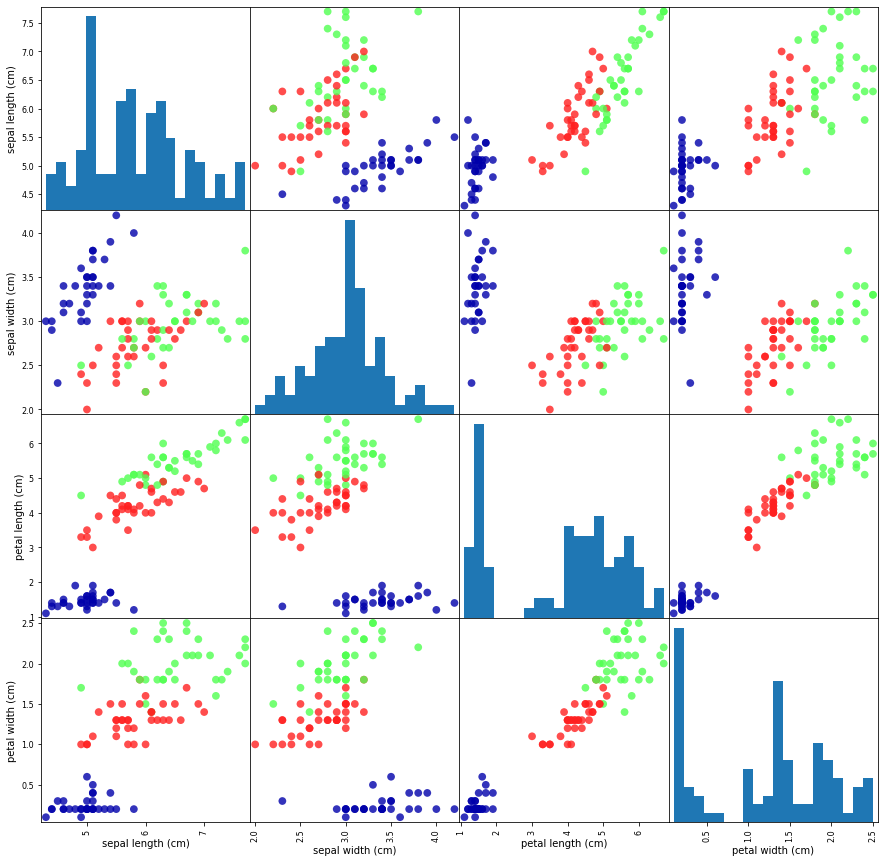

In [7]:
# size를 변경한 데이터 출력
iris_dataframe2 = pd.DataFrame(x_train2, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe2, c = y_train2, figsize= (15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [11]:
# 이웃수 변경
knn2 = KNeighborsClassifier(n_neighbors=15)
knn3 = KNeighborsClassifier(n_neighbors=30)
# knn과 같은 훈련데이터와 레이블로 모델 훈련
knn2.fit(x_train, y_train)
# knn3에 다른 테스트 케이스 삽입
knn3.fit(x_train2, y_train2)
# 테스트 세트에 대한 예측값
y_pred2 = knn2.predict(x_test)
y_pred3 = knn3.predict(x_test)
prediction2 = knn2.predict(X_new)
prediction3 = knn3.predict(X_new)

#첫번째 결과와 비교
print("예측값 비교")
print(prediction)
print(prediction2)
print(prediction3)

print("각 데이터의 원소 비교")
print(y_pred)
print(y_pred2)
print(y_pred3)

print("각 데이터의 차이 비교")
print(format(np.mean(prediction == prediction2)))
print(format(np.mean(prediction3 == prediction2)))

print("원소의 일치율 비교")
print(format(np.mean(y_pred == y_pred2)))
# 3번과 원소의 갯수 차이가 나기때문에 생략

print("각 원소의 정확도 위는 defult 아래는 size = 0.33일 경우 ")
print("knn")
print(format(knn.score(x_test,y_test)))
print("knn2")
print(format(knn3.score(x_test,y_test)))
print("knn3")
print(format(knn2.score(x_test,y_test)))

예측값 비교
[0]
[0]
[0]
각 데이터의 원소 비교
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 1]
각 데이터의 차이 비교
1.0
1.0
원소의 일치율 비교
1.0
각 원소의 정확도 위는 defult 아래는 size = 0.33일 경우 
knn
0.9736842105263158
1.0
knn2
0.9736842105263158
1.0
knn3
0.9736842105263158
1.0
